In [2]:
import gym
import numpy as np
import copy
import matplotlib.pyplot as plt

# Functions to show results

In [3]:
def plot_states(states, title):
    fig, ax = plt.subplots()
    l1, = ax.plot(np.array(states)[:, 0], 'black')
    l2, = ax.plot(np.array(states)[:, 1], 'coral')
    l3, = ax.plot(np.array(states)[:, 2], 'red')
    l4, = ax.plot(np.array(states)[:, 3], 'green')
    ax.set_xticks(np.arange(0,160,10))
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_xlabel("Days")
    ax.set_ylabel("Population Ratio")
    ax.set_title("Local city, " + title)
    ax.legend((l1, l2, l3, l4), ("Susceptible", "Exposed", "Infectious", "Recovered"))
    plt.show()

    fig, ax = plt.subplots()
    l1, = ax.plot(np.array(states)[:, 4], 'black')
    l2, = ax.plot(np.array(states)[:, 5], 'coral')
    l3, = ax.plot(np.array(states)[:, 6], 'red')
    l4, = ax.plot(np.array(states)[:, 7], 'green')
    ax.set_xticks(np.arange(0,160,10))
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_xlabel("Days")
    ax.set_ylabel("Population Ratio")
    ax.set_title("Remote city, " + title)
    ax.legend((l1, l2, l3, l4), ("Susceptible", "Exposed", "Infectious", "Recovered"))
    plt.show()
    
    print(f"Local final (%): {(np.array(states)[-1, :4]*1e4).astype(np.int)/1e2}")
    print(f"Remote final (%): {(np.array(states)[-1, -4:]*1e4).astype(np.int)/1e2}")

In [4]:
def plot_states_ax(ax, states, local, alpha = 1):
    if local:
        l1, = ax.plot(np.array(states)[:, 0], color = 'black', alpha = alpha)
        l2, = ax.plot(np.array(states)[:, 1], color = 'coral', alpha = alpha)
        l3, = ax.plot(np.array(states)[:, 2], color = 'red', alpha = alpha)
        l4, = ax.plot(np.array(states)[:, 3], color = 'green', alpha = alpha)
    else:
        l1, = ax.plot(np.array(states)[:, 4], color = 'black', alpha = alpha)
        l2, = ax.plot(np.array(states)[:, 5], color = 'coral', alpha = alpha)
        l3, = ax.plot(np.array(states)[:, 6], color = 'red', alpha = alpha)
        l4, = ax.plot(np.array(states)[:, 7], color = 'green', alpha = alpha)
        
    ax.legend((l1, l2, l3, l4), ("Susceptible", "Exposed", "Infectious", "Recovered"), loc=1)
    
    return ax

In [5]:
def plot_state_base(states, states_base0, title):
    fig, ax = plt.subplots()
    ax = plot_states_ax(ax, states_base0, True, alpha = 0.2)
    ax = plot_states_ax(ax, states, True)

    ax.set_xticks(np.arange(0,160,10))
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_xlabel("Days")
    ax.set_ylabel("Population Ratio")
    ax.set_title("Local city, " + title)
    plt.show()

    fig, ax = plt.subplots()
    ax = plot_states_ax(ax, states_base0, False, alpha = 0.2)
    ax = plot_states_ax(ax, states, False)

    ax.set_xticks(np.arange(0,160,10))
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_xlabel("Days")
    ax.set_ylabel("Population Ratio")
    ax.set_title("Remote city, " + title)
    plt.show()
    
    print(f"Local final (%): {(np.array(states)[-1, :4]*1e4).astype(np.int)/1e2}")
    print(f"Remote final (%): {(np.array(states)[-1, -4:]*1e4).astype(np.int)/1e2}")

In [6]:
def plot_actions(actions, title):
    fig, ax = plt.subplots()
    l1, = ax.plot(np.array(actions)[:, 0], "blue")
    l2, = ax.plot(np.array(actions)[:, 1], "coral")

    ax.set_xticks(np.arange(0,160,10))
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_xlabel("Days")
    ax.set_ylabel("Percentage")
    ax.set_title("Flight decisions, " + title)
    ax.legend((l1, l2), ("Flight Number", "Seat Occupancy"))
    plt.show()

In [61]:
# Plot actions with rewards and passenger_infectious
def plot_actions_rewards(actions, rewards, passenger_states, title):
    fig = plt.figure(figsize=(8,6))

    ax1 = fig.add_subplot()
    l1, = ax1.plot(rewards, color="black", alpha=0.5)
    ax1.yaxis.get_major_formatter().set_powerlimits((0,3))
    ax1.set_xticks(np.arange(0,len(actions)+10,10))
    ax1.set_xlabel("Days")
    ax1.set_ylabel("Rewards")
    ax1.set_title(title)

    ax2 = ax1.twinx()
    l2, = ax2.plot(np.array(actions)[:,0], color="blue")
    l3, = ax2.plot(np.array(actions)[:,1], color="coral")
    l4, = ax2.plot(np.array(passenger_states)[:,1]/np.array(passenger_states)[:,0], color="red")

    ax2.set_ylabel("Ratio")
    ax2.set_yticks(np.arange(0, 1.2, 0.2))
    ax2.legend((l2, l3, l1, l4), ("Flight num", "Occupancy", "Rewards", "Infectious passenger"),bbox_to_anchor=(1.1,0.66))
    plt.show()


In [8]:
def plot_rewards(rewards, title):
    fig, ax = plt.subplots()
    ax.plot(rewards, "black")
    ax.set_xticks(np.arange(0,160,10))
    ax.yaxis.get_major_formatter().set_powerlimits((0,3))
    ax.set_xlabel("Days")
    ax.set_ylabel("Reward")
    ax.set_title("Rewards, " + title)
    plt.show()
    
    print(f"max reward: {np.argmax(rewards)}, {np.max(rewards)}")
    print(f"min reward: {np.argmin(rewards)}, {np.min(rewards)}")
    print(f"sum reward: {np.sum(rewards)}")

In [9]:
def plot_ep_rewards(aggr_ep_rewards, title):
    fig, ax = plt.subplots()
    l1, = ax.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], 'blue')
    l2, = ax.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], 'green')
    l3, = ax.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], 'coral')
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Rewards")
    ax.set_title("Episode Rewards, " + title)
    ax.legend((l3, l1, l2), ('max', 'avg', 'min'))
    plt.show()

In [10]:
def print_actions(actions, show = True):
    action_index = [0]
    for i in range(1, 150):
        if not (actions[i] == actions[i-1]).all():
            action_index.append(i)
    
    if show:
        print("Day\tFlight\tOccupancy")
        for idx in action_index:
            print(f"{idx}\t{int(actions[idx][0]*1e4)/1e2}%\t{int(actions[idx][1]*1e4)/1e2}%")
    
    return action_index

In [11]:
def calc_action_realism(actions):
    action_idx = print_actions(actions, False)
    action_deriv = np.array([0, 0], dtype="float64")
    for idx in range(1, len(action_idx)):
        action_deriv+=np.abs(np.array(actions)[action_idx[idx]]-np.array(actions)[action_idx[idx-1]])/(action_idx[idx]-action_idx[idx-1])
    return np.sum(action_deriv)


In [12]:
def evaluate(states, actions, rewards, passenger_states):   
    result = []
    result.append(calc_action_realism(actions))             # action realistic level
    result.append(np.sum(np.array(passenger_states)[:, 0])) # total passenger num in 150 days
    result.append(np.sum(np.array(actions)[:, 0]))          # total flight num in 150 days
    result.append(np.sum(np.array(states)[:, 2])*local_severity_assumptions["population"]+np.sum(np.array(states)[:, 6])*remote_severity_assumptions["population"])  # total infectious num in both cities in 150 days
    result.append(np.sum(np.array(states)[:, 3])*local_severity_assumptions["population"]+np.sum(np.array(states)[:, 7])*remote_severity_assumptions["population"])  # total recovered num in both cities in 150 days
    result.append(np.sum(np.array(passenger_states)[:, 1])) # total infectious num among passengers in 150 days
    
    return np.array(result)

In [13]:
def plot_eval(choice_list, choice_eval, title, xlabel):
    figure, ax = plt.subplots()
    legend = ["Action unrealism", "Passenger num", "Flight num", "Infectious num", "Recovered num"]
    for i in range(5):
        ax.plot(np.array(choice_list), choice_eval[:,i]/np.max(choice_eval[:,i]), ".-", label=legend[i])

    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Ratio")
    ax.set_yticks(np.arange(0,1.2,0.2))
    ax.set_title(title)

    plt.show()

#  Pre-defined parameters

In [14]:
remote_severity_assumptions = {
    "population": 1000000,          # e.g: about LA population
    "infectious": 50000             # e.g: LA case number
}

local_severity_assumptions = {
    "population": 1000000,          # e.g: assume identical inbound and outbound severity
    "infectious": 50000             # e.g: assum identical
}

flight_assumptions = {
    "flight_dis": 0.75,             # ratio, real_flight_hour/max_flight_hour (18.5h from Sigapore to New Jersey)
    "max_flight": 300,              # estimated max flight_num for the airport or area
    "full_capacity": 200            # estimated avg passenger_num per flight (may change due to airport or country)
}

virus_assumptions = {
    "delay_days": 14,               # num of days between infectious and detection
    "R0": 2.2,                      # reproductive number: suspectible -> exposed
    "latency_days": 5.2,            # avg incubation days: exposed -> infectious
    "infectious_days": 2.3          # avg recovery days: infectious -> recovered
}


# Define env

In [15]:
class FlightEnv(gym.Env):
    def __init__(self, remote_severity_params = remote_severity_assumptions, local_severity_params = local_severity_assumptions, flight_params = flight_assumptions, virus_params = virus_assumptions, time_delta = 1, max_steps = 150, flight_cost = 1, passenger_reward = 1, infectious_penalty = 10):
        super().__init__()
        
        self.remote_severity_params = remote_severity_params
        self.local_severity_params = local_severity_params
        self.flight_params = flight_params
        self.virus_params = virus_params

        self.time_delta = time_delta
        self.max_steps = max_steps
        self.flight_cost = flight_cost
        self.passenger_reward = passenger_reward
        self.infectious_penalty = infectious_penalty
        
        state = self.reset()
        
        self.observation_space = gym.spaces.Box(0, 1, (8, ))
        self.observation_space.n = 8
        self.action_space = gym.spaces.Box(0, 1, (2, ))
        self.action_space.n = 2
        

    
    def reset(self):
        self.local_susceptible = self.local_severity_params["population"] - self.local_severity_params["infectious"]
        self.local_exposed = 0
        self.local_infectious = self.local_severity_params["infectious"]
        self.local_recovered = 0

        self.remote_susceptible = self.remote_severity_params["population"] - self.remote_severity_params["infectious"]
        self.remote_exposed = 0
        self.remote_infectious = self.remote_severity_params["infectious"]
        self.remote_recovered = 0

        self.steps = 0
        self.reward = 0

        return self.calc_state()

    def calc_state(self):
        local_state = copy.deepcopy(np.array((self.local_susceptible, self.local_exposed, self.local_infectious, self.local_recovered)))
        local_state = local_state/self.local_severity_params["population"]
        remote_state = copy.deepcopy(np.array((self.remote_susceptible, self.remote_exposed, self.remote_infectious, self.remote_recovered)))
        remote_state = remote_state/self.remote_severity_params["population"]
        state = np.hstack((local_state, remote_state))
        return state

    # action: (flight_num, occupancy)
    # flight_num in [0, 1]; occupancy in [0, 1]
    # real flight num = flight_num * self.flight_params["max_flight"]
    # real passenger per flight = occupancy * self.flight_params["full_capacity"]
    def step(self, action):
        # Define all the paramaters in SEIR model
        spread_rate = self.virus_params["R0"]/self.virus_params["infectious_days"]      # beta in SEIR equation
        incubation_rate = 1/self.virus_params["latency_days"]  # sigma in SEIR equation
        recovery_rate = 1/self.virus_params["infectious_days"]  # gamma in SEIR equation

        # Save the prev state for updating
        prev_state = {}
        prev_state["local_susceptible"] = copy.deepcopy(self.local_susceptible)
        prev_state["local_exposed"] = copy.deepcopy(self.local_exposed)
        prev_state["local_infectious"] = copy.deepcopy(self.local_infectious)
        prev_state["local_recovered"] = copy.deepcopy(self.local_recovered)
        prev_state["remote_susceptible"] = copy.deepcopy(self.remote_susceptible)
        prev_state["remote_exposed"] = copy.deepcopy(self.remote_exposed)
        prev_state["remote_infectious"] = copy.deepcopy(self.remote_infectious)
        prev_state["remote_recovered"] = copy.deepcopy(self.remote_recovered)


        # Natural update local states after time_delta
        self.local_susceptible -= spread_rate * prev_state["local_susceptible"] * prev_state["local_infectious"] / self.local_severity_params["population"] * self.time_delta
        self.local_exposed += (spread_rate * prev_state["local_susceptible"] * prev_state["local_infectious"] / self.local_severity_params["population"] - incubation_rate * prev_state["local_exposed"]) * self.time_delta
        self.local_infectious += (incubation_rate * prev_state["local_exposed"] - recovery_rate * prev_state["local_infectious"]) * self.time_delta
        self.local_recovered += recovery_rate * prev_state["local_infectious"] * self.time_delta

        # Natural update remote states after time_delta
        self.remote_susceptible -= spread_rate * prev_state["remote_susceptible"] * prev_state["remote_infectious"] / self.remote_severity_params["population"] * self.time_delta
        self.remote_exposed += (spread_rate * prev_state["remote_susceptible"] * prev_state["remote_infectious"] / self.remote_severity_params["population"] - incubation_rate * prev_state["remote_exposed"]) * self.time_delta
        self.remote_infectious += (incubation_rate * prev_state["remote_exposed"] - recovery_rate * prev_state["remote_infectious"]) * self.time_delta
        self.remote_recovered += recovery_rate * prev_state["remote_infectious"] * self.time_delta


        # Update influence of flight
        passenger_num = action[0] * action[1] * self.flight_params["max_flight"] * self.flight_params["full_capacity"]

        # Inbound flight influence for local
        self.local_susceptible *= 1 - passenger_num/self.local_severity_params["population"]
        self.local_exposed *= 1 - passenger_num/self.local_severity_params["population"]
        self.local_infectious *= 1 - passenger_num/self.local_severity_params["population"]
        self.local_recovered *= 1 - passenger_num/self.local_severity_params["population"]

        passenger_remote_infectious = passenger_num * prev_state["remote_infectious"] / self.remote_severity_params["population"]
        passenger_remote_exposed = passenger_remote_infectious * self.virus_params["R0"] * action[1] * self.flight_params["flight_dis"]
        if passenger_remote_infectious + passenger_remote_exposed > passenger_num:
            passenger_remote_exposed = passenger_num - passenger_remote_infectious

        self.local_infectious += passenger_remote_infectious
        self.local_exposed += passenger_remote_exposed
        self.local_susceptible += passenger_num - passenger_remote_infectious - passenger_remote_exposed

        # Outbound flight influence for remote
        self.remote_susceptible *= 1 - passenger_num/self.remote_severity_params["population"]
        self.remote_exposed *= 1 - passenger_num/self.remote_severity_params["population"]
        self.remote_infectious *= 1 - passenger_num/self.remote_severity_params["population"]
        self.remote_recovered *= 1 - passenger_num/self.remote_severity_params["population"]

        passenger_local_infectious = passenger_num * prev_state["local_infectious"] / self.local_severity_params["population"]
        passenger_local_exposed = passenger_local_infectious * self.virus_params["R0"] * action[1] * self.flight_params["flight_dis"]
        if passenger_local_infectious + passenger_local_exposed > passenger_num:
            passenger_local_exposed = passenger_num - passenger_local_infectious

        self.remote_infectious += passenger_local_infectious
        self.remote_exposed += passenger_local_exposed
        self.remote_susceptible += passenger_num - passenger_local_infectious - passenger_local_exposed

        
        # Update reward
        self.reward = 0
        self.reward -= self.flight_cost * action[0]
        self.reward += self.passenger_reward * passenger_num
        self.reward -= self.infectious_penalty * (passenger_local_infectious + passenger_remote_infectious)

        self.steps += 1
        done = self.steps >= self.max_steps

        return self.calc_state(), self.reward, done, {}


In [23]:
# base = 0 or 1
def run_baseline(base, remote_severity_params = remote_severity_assumptions, local_severity_params = local_severity_assumptions, flight_params = flight_assumptions, flight_cost = 1, passenger_reward = 1, infectious_penalty = 10):
    env = FlightEnv(remote_severity_params = remote_severity_params, local_severity_params = local_severity_assumptions, flight_params = flight_params, flight_cost = flight_cost, passenger_reward = passenger_reward, infectious_penalty = infectious_penalty)

    done = False
    states = []
    actions = []
    rewards = []
    passenger_states = []

    state = env.reset()
    states.append(state)

    if base == 0:
        action = np.array([0, 0])
    elif base == 1:
        action = np.array([1, 1])

    while not done:
        new_state, reward, done, passenger_state = env.step(action)

        states.append(new_state)
        actions.append(action)
        rewards.append(reward)
        passenger_states.append(passenger_state)

    env.close()
    
    return states, actions, rewards, passenger_states

# Extreme test: flight = 0, occupancy = 0

In [277]:
env = FlightEnv()

done = False
states = []
rewards = []

states.append(env.reset())

while not done:
    action = ((0, 0))
    new_state, reward, done, _ = env.step(action)
    states.append(new_state)
    rewards.append(reward)

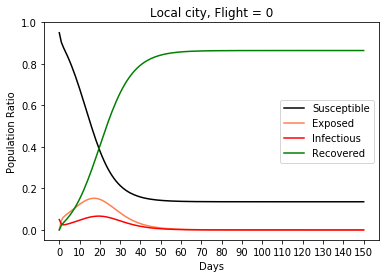

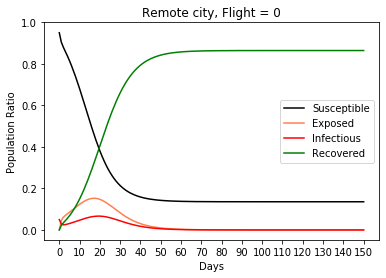

Local final (%): [13.57  0.    0.   86.42]
Remote final (%): [13.57  0.    0.   86.42]


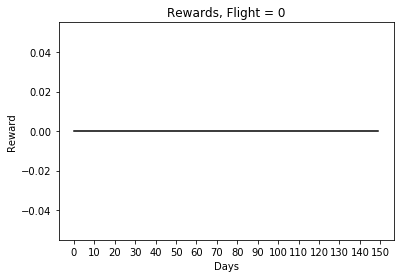

In [278]:
title = "Flight = 0"
plot_states(states, title)
plot_rewards(rewards, title)

# Extreme test: flight = 1, occupancy = 1

In [386]:
env = FlightEnv()

done = False
states = []
rewards = []

states.append(env.reset())

while not done:
    action = ((1, 1))
    new_state, reward, done, _ = env.step(action)
    states.append(new_state)
    rewards.append(reward)

env.close()

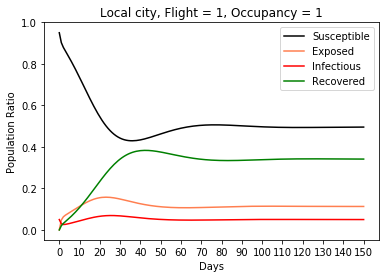

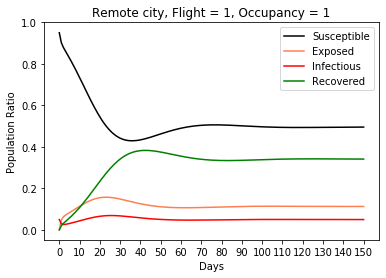

Local final (%): [49.54 11.31  5.   34.13]
Remote final (%): [49.54 11.31  5.   34.13]


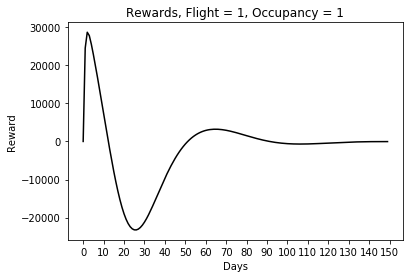

In [281]:
title = "Flight = 1, Occupancy = 1"
plot_states(states, title)
plot_rewards(rewards, title)

# Random action test

In [385]:
env = FlightEnv()

done = False
states = []
actions = []
rewards = []

states.append(env.reset())

while not done:
    action = np.random.uniform(0, 1, 2)
    new_state, reward, done, _ = env.step(action)
    states.append(new_state)
    actions.append(action)
    rewards.append(reward)

env.close()

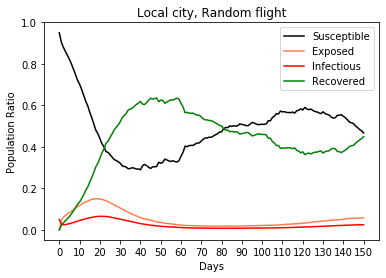

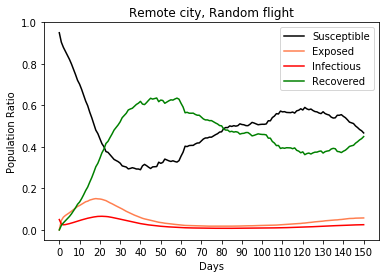

Local final (%): [46.73  5.77  2.52 44.96]
Remote final (%): [46.73  5.77  2.52 44.96]


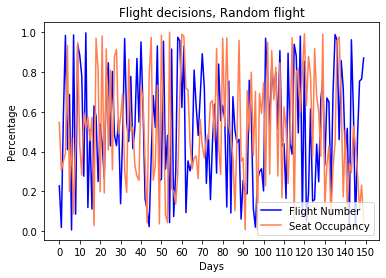

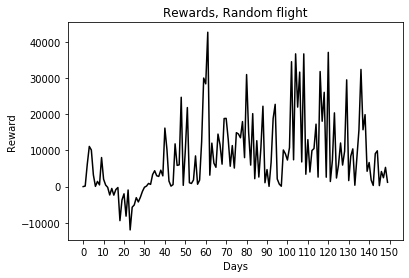

In [293]:
title = "Random flight"
plot_states(states, title)
plot_actions(actions, title)
plot_rewards(rewards, title)

# Q learning Algorithm

In [16]:
# Learning paras
LEARNING_RATE = 0.1
DISCOUNT = 0.95     # gamma, how much we value future reward over current reward
EPISODES = 200000

SHOW_EVERY = 1000

epsilon = 0.9
EPSILON_DECAY = 0.99999
MIN_EPSILON = 0.1

In [17]:
# Define continuous to discrete paras
state_bins = 30     # can change to more bins
flight_unit = 2     # in action: decide on every 5 flights (can change)
seat_unit = 2       # in action: decide on every 5 seats (can change)

DISCRETE_STATE_SIZE = [state_bins] * 2
DISCRETE_ACTION_SIZE = [int(flight_assumptions["max_flight"]/flight_unit), int(flight_assumptions["full_capacity"]/seat_unit)]

print(DISCRETE_STATE_SIZE)
print(DISCRETE_ACTION_SIZE)

[30, 30]
[150, 100]


In [637]:
# Convert continuous to discrete
def get_discrete_state(state):
    discrete_state = []
    discrete_state.append(state[2] * state_bins)
    discrete_state.append(state[6] * state_bins)
    return tuple(np.array(discrete_state).astype(np.int))

def get_discrete_action(action):
    discrete_action = np.array(action) * DISCRETE_ACTION_SIZE
    return tuple(discrete_action.astype(np.int))

In [638]:
def test_qtable(q_table, title):
    env = FlightEnv()

    done = False
    states = []
    actions = []
    rewards = []

    state = env.reset()
    states.append(state)
    discrete_state = get_discrete_state(state)

    while not done:
        discrete_action = (np.argmax(np.max(q_table[discrete_state], axis = 1)), np.argmax(np.max(q_table[discrete_state], axis = 0)))
        action = np.array(discrete_action) / DISCRETE_ACTION_SIZE

        new_state, reward, done, _ = env.step(action)
        discrete_state = get_discrete_state(new_state)

        states.append(new_state)
        actions.append(action)
        rewards.append(reward)

    env.close()
    
    plot_states(states, title)
    plot_actions(actions, title)
    plot_rewards(rewards, title)

In [639]:
# Begin learning
env = FlightEnv()
q_table = np.random.uniform(low = 0, high = 1, size = (DISCRETE_STATE_SIZE + DISCRETE_ACTION_SIZE))
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'min': [], 'max': []}

for episode in range(EPISODES):
    episode_reward = 0

    discrete_state = get_discrete_state(env.reset())
    done = False
    while not done:
        # Use epsilon for exploration
        if np.random.random() < epsilon:
            discrete_action = (np.random.randint(0, DISCRETE_ACTION_SIZE[0]), np.random.randint(0, DISCRETE_ACTION_SIZE[1]))
        else:
            discrete_action = (np.argmax(np.max(q_table[discrete_state], axis = 1)), np.argmax(np.max(q_table[discrete_state], axis = 0)))
        action = np.array(discrete_action) / DISCRETE_ACTION_SIZE

        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        # Update Q table
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + discrete_action]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + discrete_action] = new_q

        discrete_state = new_discrete_state

    epsilon = max(epsilon * EPSILON_DECAY, MIN_EPSILON)
        
    ep_rewards.append(episode_reward)
    if not episode % SHOW_EVERY:
        avg_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(avg_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))

        print(f"episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-SHOW_EVERY:])} max:{max(ep_rewards[-SHOW_EVERY:])}")

env.close()

episode:0 avg:1330809.5462248877 min:1330809.5462248877 max:1330809.5462248877
episode:1000 avg:1315099.727524843 min:1070611.8032453444 max:1532538.894131228
episode:2000 avg:1372892.2639646519 min:1140838.6892393632 max:1630094.4581250956
episode:3000 avg:1430476.9365494782 min:1181476.7769478692 max:1662550.070222381
episode:4000 avg:1445341.3540144397 min:1219394.434018522 max:1634431.868084966
episode:5000 avg:1427209.0037884177 min:1194011.2726059582 max:1616565.2996334655
episode:6000 avg:1450976.8359227907 min:1204070.1315756503 max:1726496.7640705586
episode:7000 avg:1452659.5109308073 min:1209895.3290422908 max:1641094.5461435446
episode:8000 avg:1467015.9853292985 min:1181260.1908529713 max:1691470.7290150027
episode:9000 avg:1462254.4575782295 min:1240782.5116643512 max:1684737.0704842173
episode:10000 avg:1470473.198857274 min:1230675.826371255 max:1736440.004543307
episode:11000 avg:1474003.4834221394 min:1134195.35637571 max:1712799.9628371594
episode:12000 avg:1482961.0

episode:100000 avg:1742805.0983477568 min:1319253.2290166714 max:2206316.7569304937
episode:101000 avg:1749479.297731955 min:1348502.957474702 max:2139363.7351578083
episode:102000 avg:1752359.5739569229 min:1293592.0379965326 max:2172400.242133882
episode:103000 avg:1733278.4278911604 min:1261617.0840444781 max:2247807.6718176194
episode:104000 avg:1739403.809342359 min:1189823.8072852604 max:2205279.1544804038
episode:105000 avg:1739474.5047321755 min:1286530.619268759 max:2220584.196024723
episode:106000 avg:1743316.5687303904 min:1294021.626897839 max:2235625.5086348997
episode:107000 avg:1740923.6658725154 min:1392731.6926836483 max:2243568.8967373725
episode:108000 avg:1730230.0606633336 min:1178755.015949071 max:2163080.532390073
episode:109000 avg:1740892.285653925 min:1203173.8422687177 max:2260134.673996804
episode:110000 avg:1744641.00211015 min:1227855.4335738434 max:2165682.8135123695
episode:111000 avg:1749297.008407627 min:1320757.8062129589 max:2166857.58435248
episode:

episode:199000 avg:1762641.6134606388 min:961830.8234662759 max:2405888.960524992


# Evaluations

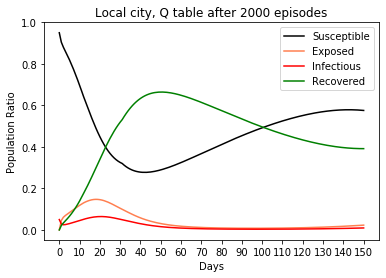

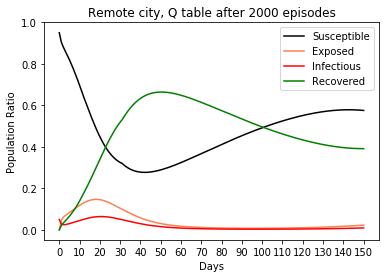

Local final (%): [57.56  2.31  0.96 39.16]
Remote final (%): [57.56  2.31  0.96 39.16]


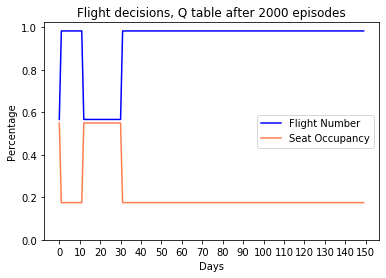

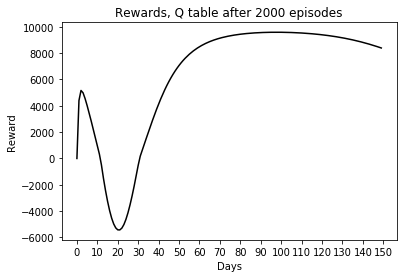

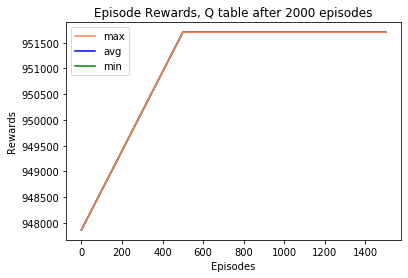

In [418]:
# no epsilon exploration
title = "Q table after 2000 episodes"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

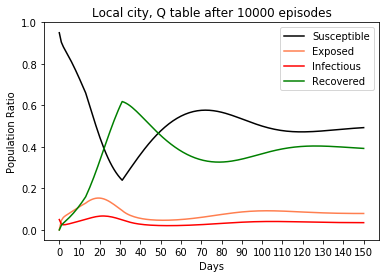

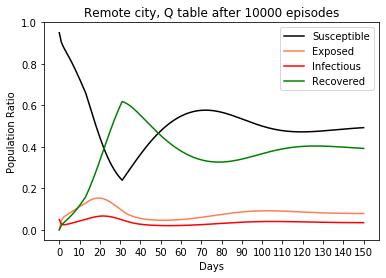

Local final (%): [49.28  7.92  3.5  39.27]
Remote final (%): [49.28  7.92  3.5  39.27]


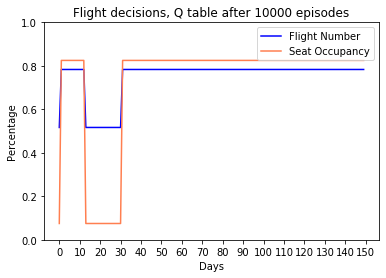

Final flight num (%): 0.7833333333333333
Final occupancy (%): 0.825


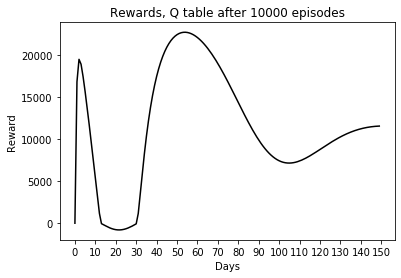

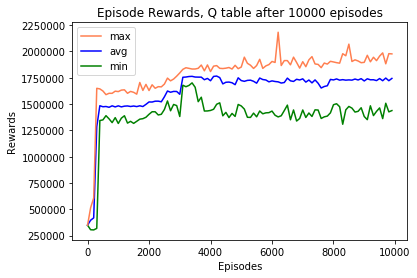

In [425]:
title = "Q table after 10000 episodes"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.9
# epsilon_decay = 0.9999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5
# reward = (1, 1, -10)

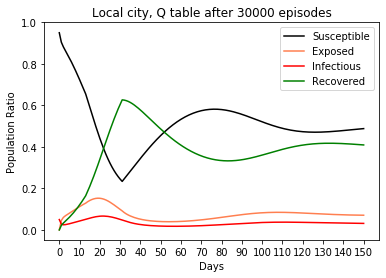

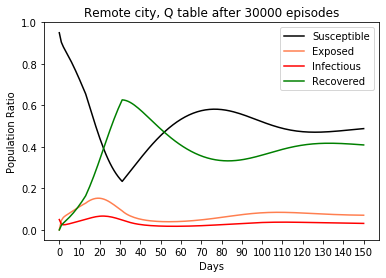

Local final (%): [48.81  7.08  3.14 40.94]
Remote final (%): [48.81  7.08  3.14 40.94]


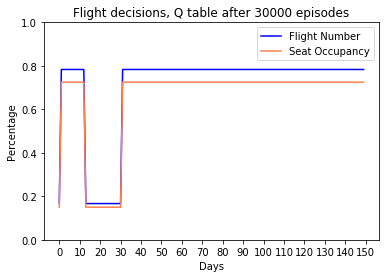

Final flight num (%): 0.7833333333333333
Final occupancy (%): 0.725


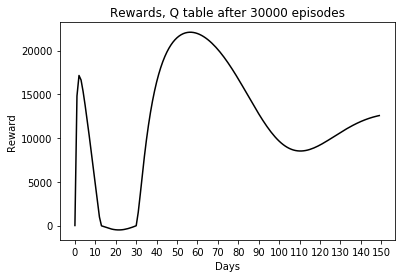

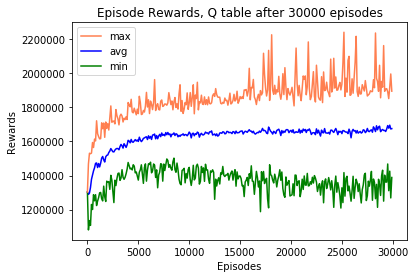

In [563]:
title = "Q table after 30000 episodes"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.9
# epsilon_decay = 0.9999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

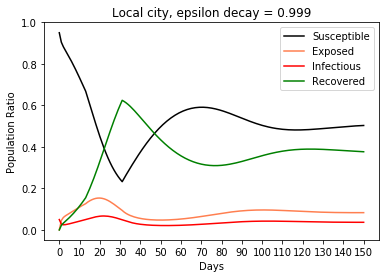

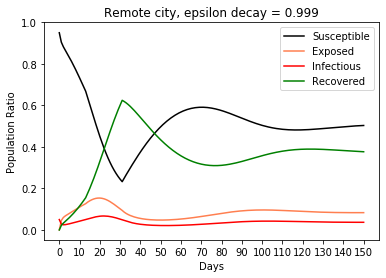

Local final (%): [50.32  8.33  3.68 37.66]
Remote final (%): [50.32  8.33  3.68 37.66]


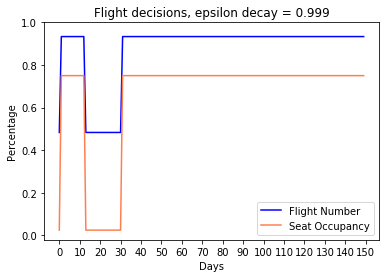

Final flight num (%): 0.9333333333333333
Final occupancy (%): 0.75


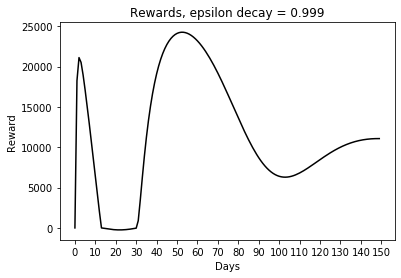

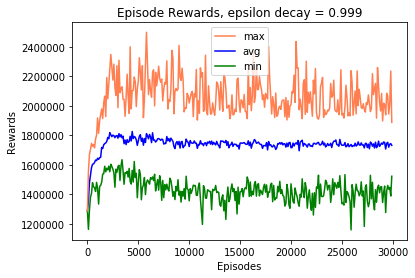

In [571]:
title = "epsilon decay = 0.999"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.9
# epsilon_decay = 0.999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

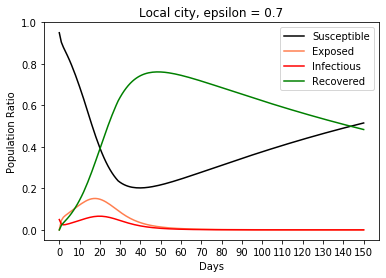

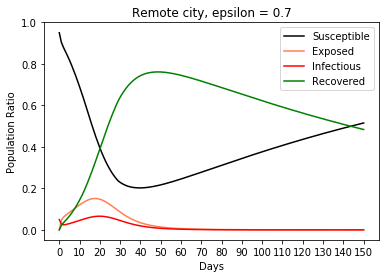

Local final (%): [5.152e+01 6.000e-02 2.000e-02 4.837e+01]
Remote final (%): [5.152e+01 6.000e-02 2.000e-02 4.837e+01]


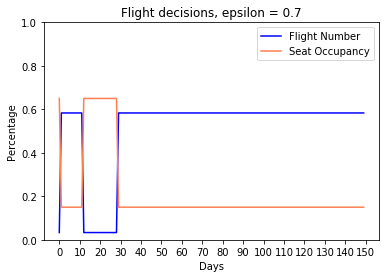

Final flight num (%): 0.5833333333333334
Final occupancy (%): 0.15


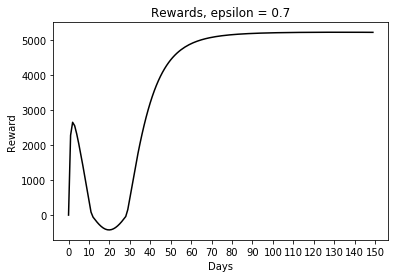

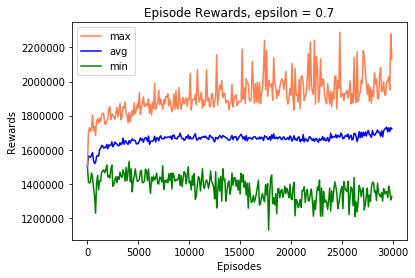

In [577]:
title = "epsilon = 0.7"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.7
# epsilon_decay = 0.9999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

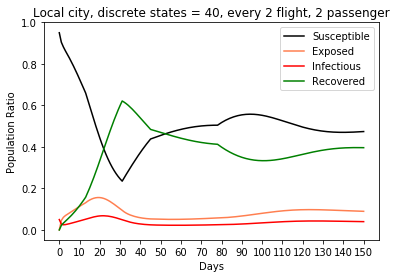

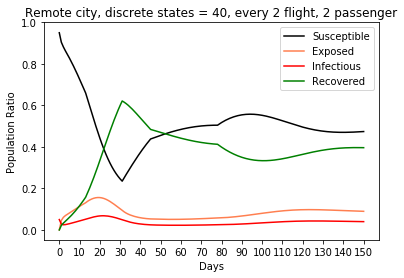

Local final (%): [47.4   8.97  4.   39.62]
Remote final (%): [47.4   8.97  4.   39.62]


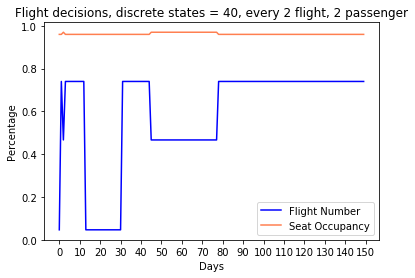

Final flight num (%): 0.74
Final occupancy (%): 0.96


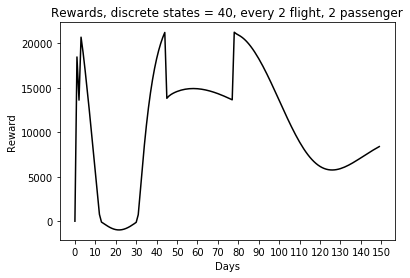

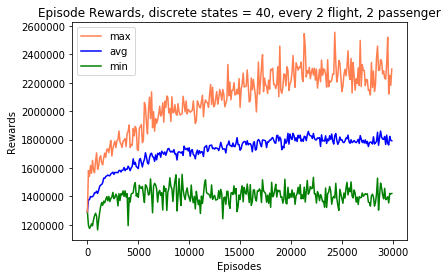

In [582]:
title = "discrete states = 40, every 2 flight, 2 passenger"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.9
# epsilon_decay = 0.9999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

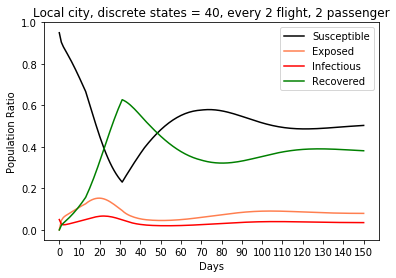

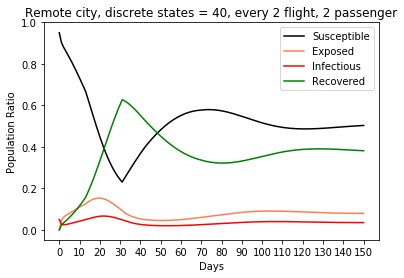

Local final (%): [50.34  7.97  3.53 38.14]
Remote final (%): [50.34  7.97  3.53 38.14]


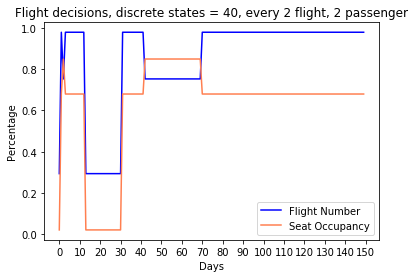

Final flight num (%): 0.98
Final occupancy (%): 0.68


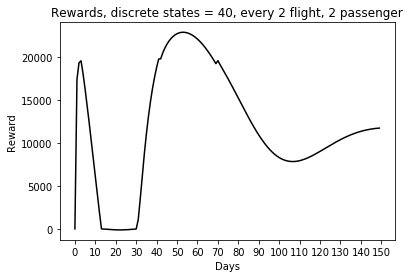

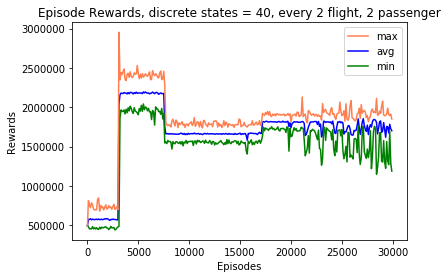

In [585]:
# (40, 2, 2) test 2
title = "discrete states = 40, every 2 flight, 2 passenger"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.9
# epsilon_decay = 0.9999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

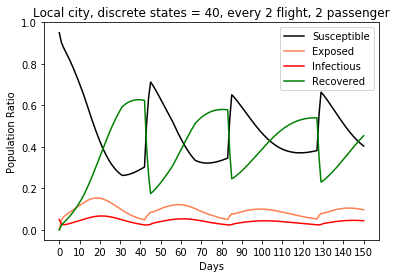

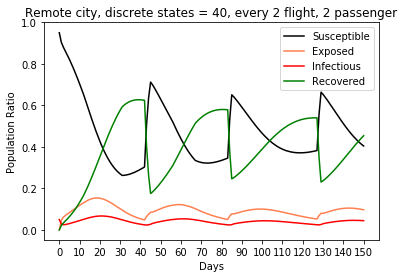

Local final (%): [40.44  9.7   4.45 45.39]
Remote final (%): [40.44  9.7   4.45 45.39]


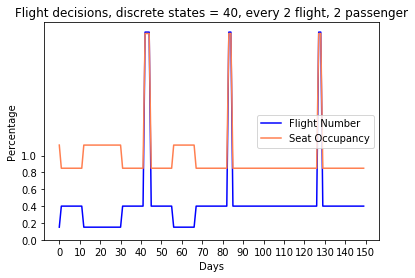

Final flight num (%): 0.4
Final occupancy (%): 0.85


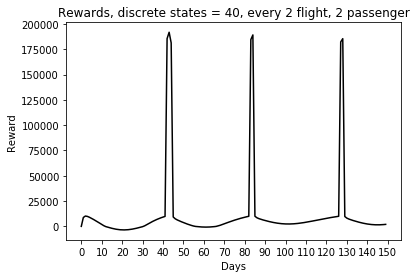

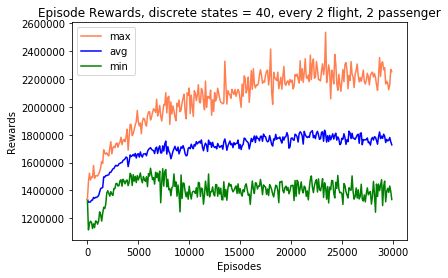

In [620]:
# (40, 2, 2) test 3
title = "discrete states = 40, every 2 flight, 2 passenger"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# epsilon = 0.9
# epsilon_decay = 0.9999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

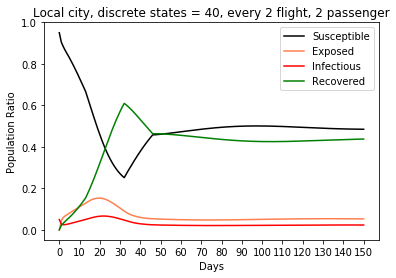

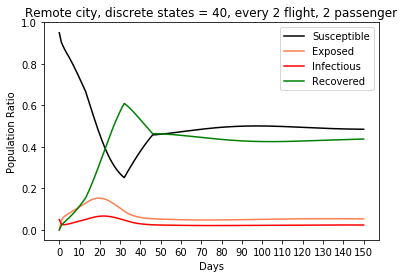

Local final (%): [48.49  5.34  2.37 43.78]
Remote final (%): [48.49  5.34  2.37 43.78]


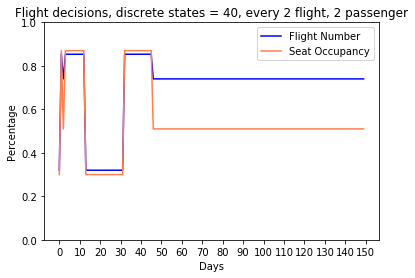

Final flight num (%): 0.74
Final occupancy (%): 0.51


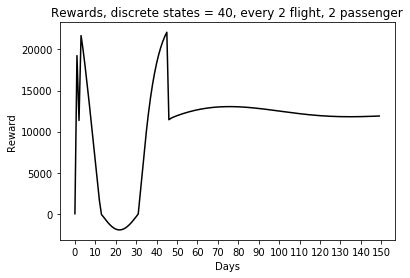

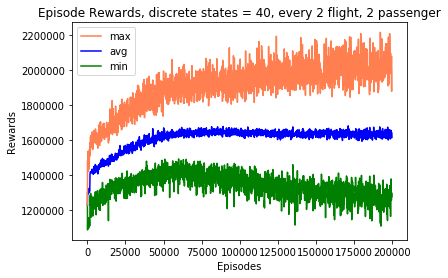

In [626]:
# (40, 2, 2) test 4
title = "discrete states = 40, every 2 flight, 2 passenger"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# episodes = 200000
# epsilon = 0.9
# epsilon_decay = 0.99999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

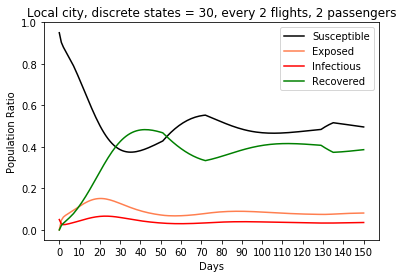

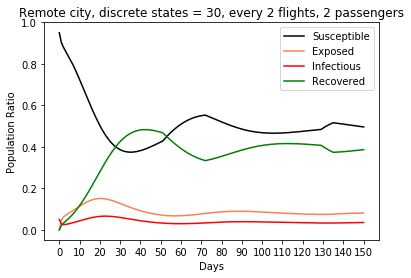

Local final (%): [49.6   8.14  3.58 38.66]
Remote final (%): [49.6   8.14  3.58 38.66]


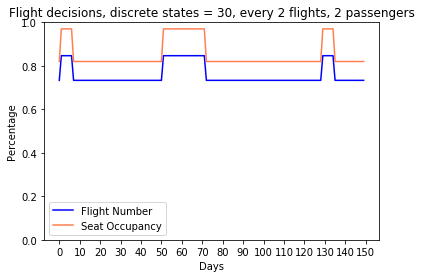

Final flight num (%): 0.7333333333333333
Final occupancy (%): 0.82


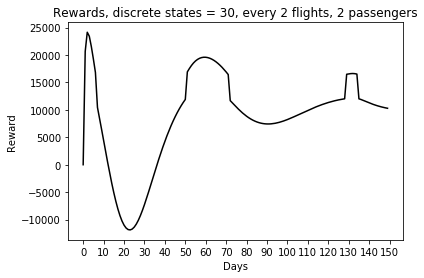

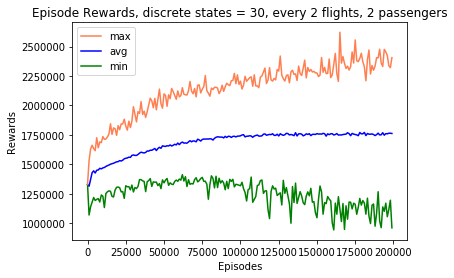

In [640]:
# (30, 2, 2), 200000 episodes
title = "discrete states = 30, every 2 flights, 2 passengers"
test_qtable(q_table, title)
plot_ep_rewards(aggr_ep_rewards, title)

# np.save("q_table", q_table)
# np.save("ep_rewards", ep_rewards)
# np.save("aggr_ep_rewards", aggr_ep_rewards)
# q_table = np.load("q_table.npy")
# ep_rewards = np.load("ep_rewards.npy")
# aggr_ep_rewards = np.load("aggr_ep_rewards.npy",allow_pickle=True).item()

# For record: paras for this result
# episodes = 200000
# epsilon = 0.9
# epsilon_decay = 0.99999
# state_bins = 20
# flight_unit = 5
# seat_unit = 5

# reward = (1, 1, -10)

# PPO: Proximal Policy Optimization Algorithms

In [457]:
from pyforce.env import DictEnv, ActionSpaceScaler, TorchEnv
from pyforce.nn.observation import ObservationProcessor
from pyforce.nn.hidden import HiddenLayers
from pyforce.nn.action import ActionMapper
from pyforce.agents import PPOAgent
import torch

In [586]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

env = FlightEnv()
env = DictEnv(env)
env = ActionSpaceScaler(env)
env = TorchEnv(env).to(device)

observation_processor=ObservationProcessor(env)
hidden_layers=HiddenLayers(observation_processor.n_output)
action_mapper=ActionMapper(env,hidden_layers.n_output)

print(observation_processor)
print(hidden_layers)
print(action_mapper)

ObservationProcessor(
  (_state): Linear(in_features=8, out_features=8, bias=True)
)
HiddenLayers(
  (hidden): Sequential(
    (0): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (1): Linear(in_features=8, out_features=64, bias=True)
    (2): ELU(alpha=1.0)
    (3): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ELU(alpha=1.0)
    (6): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (7): Linear(in_features=64, out_features=64, bias=True)
    (8): ELU(alpha=1.0)
  )
)
ActionMapper(
  (_action): BetaDistributionAction(
    (out_a): Sequential(
      (0): Linear(in_features=64, out_features=2, bias=True)
      (1): Softplus(beta=1, threshold=20)
    )
    (out_b): Sequential(
      (0): Linear(in_features=64, out_features=2, bias=True)
      (1): Softplus(beta=1, threshold=20)
    )
  )
)


G:\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [587]:
agent=PPOAgent(
    observation_processor,
    hidden_layers,
    action_mapper,
    save_path="DQN_test",
    value_lr=5e-4,
    policy_lr=5e-5
).to(device)


In [588]:
agent.train(env,episodes=30000,train_freq=512,eval_freq=50,render=False, batch_size=64,gamma=.9,tau=.95,clip=.2,n_steps=16,entropy_coef=.001)


In [486]:
def test_agent(agent, env, **kwargs):
    # this env is the env in torch

    done = False
    states = []
    actions = []
    rewards = []

    state = env.reset()
    states.append(state)

    while not done:
        action, action_info = agent.get_action(state, True, kwargs)

        new_state, reward, done, _ = env.step(action)

        states.append(new_state)
        actions.append(action)
        rewards.append(reward)
        
        state = new_state
    
    return states, actions, rewards

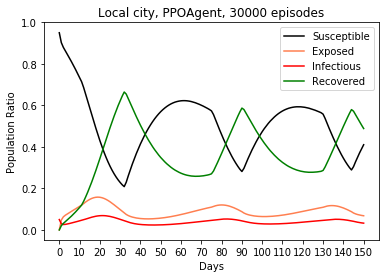

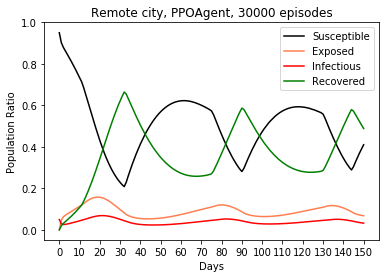

Local final (%): [41.04  6.83  3.26 48.85]
Remote final (%): [41.04  6.83  3.26 48.85]


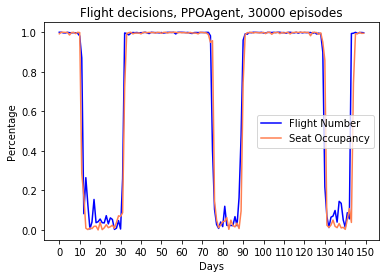

Final flight num (%): 0.9974930286407471
Final occupancy (%): 0.9948090314865112


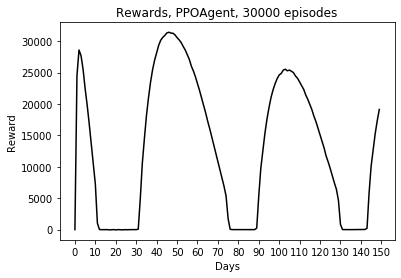

In [592]:
# Visualize "agent" result
states_ppo, actions_ppo, rewards_ppo = test_agent(agent, env)

title = "PPOAgent, 30000 episodes"

states_new = []
for each in states_ppo:
    states_new.append(list(np.array(each['state'])[0]))
plot_states(states_new, title)

actions_new = []
for each in actions_ppo:
    actions_new.append(list(np.array(each['action'])[0]))
plot_actions(actions_new, title)

rewards_new = []
for each in rewards_ppo:
    rewards_new.append(np.array(each)[0][0])
plot_rewards(rewards_new, title)

In [643]:
tf_env2 = copy.deepcopy(env)
# tf_agent2 = copy.deepcopy(agent)

In [594]:
# np.save("PPO_states", states_new)
# np.save("PPO_actions", actions_new)
# np.save("PPO_rewards", rewards_new)

In [641]:
agent

PPOAgent(
  (value_net): Sequential(
    (0): ObservationProcessor(
      (_state): Linear(in_features=8, out_features=8, bias=True)
    )
    (1): HiddenLayers(
      (hidden): Sequential(
        (0): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
        (1): Linear(in_features=8, out_features=64, bias=True)
        (2): ELU(alpha=1.0)
        (3): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (4): Linear(in_features=64, out_features=64, bias=True)
        (5): ELU(alpha=1.0)
        (6): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (7): Linear(in_features=64, out_features=64, bias=True)
        (8): ELU(alpha=1.0)
      )
    )
    (2): ValueEstimator(
      (v_out): Linear(in_features=64, out_features=1, bias=True)
    )
  )
  (policy_net): Sequential(
    (0): ObservationProcessor(
      (_state): Linear(in_features=8, out_features=8, bias=True)
    )
    (1): HiddenLayers(
      (hidden): Sequential(
        (0): LayerNorm((8,), eps=1e-05, ele

# Re-plot PPO results

In [20]:
title = "data_result_bak/PPO_30000episodes_"
states = np.load(title + "states.npy")
actions = np.load(title + "actions.npy")
rewards = np.load(title + "rewards.npy")


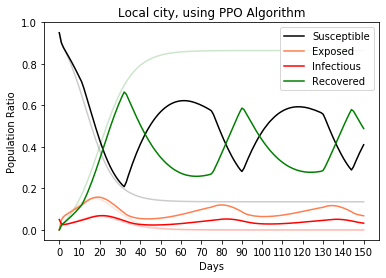

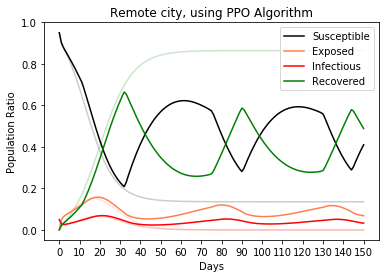

Local final (%): [41.04  6.83  3.26 48.85]
Remote final (%): [41.04  6.83  3.26 48.85]


In [25]:
plot_state_base(states,run_baseline(0)[0],"using PPO Algorithm")

In [54]:
passenger_states = []
for i in range(len(states)-1):
    passenger_num = actions[i][0] * actions[i][1] * flight_assumptions["max_flight"] * flight_assumptions["full_capacity"]
    infectious_psg_num = (states[i][2] + states[i][6]) * passenger_num
    passenger_states.append(np.array([passenger_num, infectious_psg_num]))
passenger_states = np.array(passenger_states)

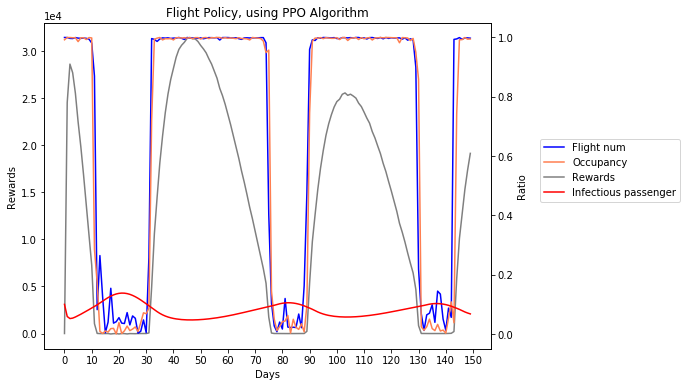

In [62]:
plot_actions_rewards(actions, rewards, passenger_states,"Flight Policy, using PPO Algorithm")

In [63]:
evaluate(states, actions, rewards, passenger_states)

array([1.47831877e+01, 5.96567616e+06, 1.05459801e+02, 1.21811018e+07,
       1.10644272e+08, 4.01249143e+05])